<a href="https://colab.research.google.com/github/Srijansarkar17/Car-Selling-Price-Prediction-using-Machine-Learning/blob/main/CarPriceprediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CAR SELLING PRICE PREDICTION DATASET

##STEP BY STEP PROCESS FOLLOWED TO TRAIN THE MODEL
1. Download and load the dataset
2. Data Preparation and Cleaning
3. Changing the column values of dataset for model training
4. Data Visualisation
5. Splitting the dataset
6. Evaluating the model for training data(used Polynomial Regression)
7. Scope for improvement


##Dataset Link
https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [2142]:
!pip install opendatasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import Normalizer

##Download the data

In [2143]:
import opendatasets as od

In [2144]:
data_filename = '/content/CAR DETAILS FROM CAR DEKHO.csv'

###Load data using pandas
Converting the dataset from csv to dataframe

In [2145]:
import pandas as pd
df = pd.read_csv(data_filename)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


##Data Preparation and Cleaning
This is where we prepare and clean the dataset for training the machine learning model

In [2146]:
!pip install pandas_summary

In [2147]:
from pandas_summary import DataFrameSummary
dfs = DataFrameSummary(df)
dfs.columns_stats

<ipython-input-2147-ce6aa294a9db>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfs = DataFrameSummary(df)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
counts,4340,4340,4340,4340,4340,4340,4340,4340
uniques,1491,27,445,770,5,3,2,5
missing,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%
types,categorical,numeric,numeric,numeric,categorical,categorical,bool,categorical


In [2148]:
df['km_driven'].max()

806599

In [2149]:
df['km_driven'].min()

1

In [2150]:
df.max(axis=0)

name             Volvo XC60 D5 Inscription
year                                  2020
selling_price                      8900000
km_driven                           806599
fuel                                Petrol
seller_type               Trustmark Dealer
transmission                        Manual
owner                          Third Owner
dtype: object

In [2151]:
df.min(axis=0)

name             Ambassador CLASSIC 1500 DSL AC
year                                       1992
selling_price                             20000
km_driven                                     1
fuel                                        CNG
seller_type                              Dealer
transmission                          Automatic
owner                               First Owner
dtype: object

In [2152]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [2153]:
df.shape

(4340, 8)

In [2154]:
df['selling_price'] = df['selling_price'].apply(lambda x: np.log(x))

In [2155]:
car_dup = df.duplicated().any()
car_dup

True

In [2156]:
df = df.drop_duplicates()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,11.002100,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,11.813030,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,13.304685,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,12.429216,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,13.017003,141000,Diesel,Individual,Manual,Second Owner


In [2157]:
df.shape

(3577, 8)

In [2158]:
car_dup = df.duplicated().any()
car_dup

False

In [2159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3577 non-null   object 
 1   year           3577 non-null   int64  
 2   selling_price  3577 non-null   float64
 3   km_driven      3577 non-null   int64  
 4   fuel           3577 non-null   object 
 5   seller_type    3577 non-null   object 
 6   transmission   3577 non-null   object 
 7   owner          3577 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 251.5+ KB


In [2160]:
df.isnull()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False
4336,False,False,False,False,False,False,False,False
4337,False,False,False,False,False,False,False,False
4338,False,False,False,False,False,False,False,False


In [2161]:
df.isnull().sum().sort_values(ascending=False)

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [2162]:
df.shape

(3577, 8)

In [2163]:
df.describe()

,year,selling_price,km_driven
count,3577.000000,3577.000000,3577.000000
mean,2012.962538,12.730341,69250.545709
std,4.251759,0.817210,47579.940016
min,1992.000000,9.903488,1.000000
25%,2010.000000,12.206073,36000.000000
50%,2013.000000,12.765688,60000.000000
75%,2016.000000,13.304685,90000.000000
max,2020.000000,16.001562,806599.000000


In [2164]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [2165]:
Q1 = df.km_driven.quantile(0.25)
Q3 = df.km_driven.quantile(0.75)
Q1, Q3

(36000.0, 90000.0)

In [2166]:
IQR = Q3 - Q1
IQR

54000.0

In [2167]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-45000.0, 171000.0)

In [2168]:
df[(df.km_driven<lower_limit)|(df.km_driven>upper_limit)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
32,Audi Q5 2.0 TDI,2011,13.989464,175900,Diesel,Dealer,Automatic,First Owner
69,Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,2010,12.542545,350000,Diesel,Individual,Manual,Second Owner
70,Toyota Corolla Altis Diesel D4DG,2011,12.765688,230000,Diesel,Individual,Manual,First Owner
159,Chevrolet Enjoy 1.3 TCDi LS 8,2015,12.611538,175000,Diesel,Individual,Manual,First Owner
197,Mahindra Xylo E4,2009,12.345830,230000,Diesel,Individual,Manual,Third Owner
...,...,...,...,...,...,...,...,...
4208,Toyota Qualis FS B3,2001,11.918391,256000,Diesel,Dealer,Manual,First Owner
4231,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,2011,13.592367,230000,Diesel,Individual,Manual,First Owner
4255,Mahindra XUV500 W8 2WD,2014,13.384728,218000,Diesel,Individual,Manual,Second Owner
4286,Fiat Punto 1.3 Emotion,2010,11.775290,210000,Diesel,Individual,Manual,Second Owner


In [2169]:
df = df[(df.km_driven>lower_limit)&(df.km_driven<upper_limit)]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,11.002100,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,11.813030,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,13.304685,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,12.429216,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,13.017003,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,12.923910,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,12.923910,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,11.608236,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,13.670485,90000,Diesel,Individual,Manual,First Owner


In [2170]:
Q1 = df.selling_price.quantile(0.25)
Q3 = df.selling_price.quantile(0.75)
Q1, Q3

(12.206072645530174, 13.304684934198283)

In [2171]:
IQR = Q3 - Q1
IQR

1.0986122886681091

In [2172]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(10.55815421252801, 14.952603367200446)

In [2173]:
df[(df.selling_price<lower_limit)|(df.selling_price>upper_limit)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,15.913528,6500,Diesel,Dealer,Automatic,First Owner
101,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,15.319588,9800,Petrol,Dealer,Automatic,First Owner
539,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,2014,15.297115,100000,Diesel,Individual,Automatic,Second Owner
553,Mercedes-Benz C-Class Progressive C 220d,2018,15.150512,10000,Diesel,Dealer,Automatic,First Owner
555,BMW X5 xDrive 30d xLine,2019,15.414898,30000,Diesel,Dealer,Automatic,First Owner
731,Land Rover Discovery Sport TD4 HSE 7S,2018,15.201805,68000,Diesel,Individual,Automatic,First Owner
963,Audi A5 Sportback,2020,15.363073,1500,Diesel,Individual,Automatic,First Owner
968,BMW 7 Series Signature 730Ld,2014,15.201805,47000,Diesel,Individual,Automatic,First Owner
988,Land Rover Discovery S 2.0 SD4,2018,15.201805,68000,Petrol,Individual,Automatic,First Owner
1088,Land Rover Discovery Sport SD4 HSE Luxury,2016,15.068274,53000,Diesel,Dealer,Automatic,First Owner


In [2174]:
df = df[(df.selling_price>lower_limit)&(df.selling_price<upper_limit)]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,11.002100,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,11.813030,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,13.304685,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,12.429216,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,13.017003,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,12.923910,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,12.923910,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,11.608236,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,13.670485,90000,Diesel,Individual,Manual,First Owner


In [2175]:
df.max(axis=0)

name             Volvo XC60 D5 Inscription
year                                  2020
selling_price                    14.946913
km_driven                           170000
fuel                                Petrol
seller_type               Trustmark Dealer
transmission                        Manual
owner                          Third Owner
dtype: object

In [2176]:
df.min(axis=0)

name             Ambassador CLASSIC 1500 DSL AC
year                                       1992
selling_price                         10.596635
km_driven                                     1
fuel                                        CNG
seller_type                              Dealer
transmission                          Automatic
owner                               First Owner
dtype: object

##Changing the column values of dataset for model
This is because we cannot train the model if the data is in string format. We have to convert it into integer
- petrol=1, diesel=0, cng=2, lpg=3 , electric=4
- manual=1, automatic=0
- individual=0, dealer=1, trustmark dealer=2
- firstowner=0, secondowner=1, thirdowner=2, Fourthandabove owner=3, Testdrivecar=4


In [2177]:
df['fuel'] = df['fuel'].map({'Petrol' : 1, 'Diesel' : 0, 'CNG' :2, 'LPG' : 3, 'Electric' : 4})

<ipython-input-2177-70f298a651dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel'] = df['fuel'].map({'Petrol' : 1, 'Diesel' : 0, 'CNG' :2, 'LPG' : 3, 'Electric' : 4})


In [2178]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,11.002100,70000,1,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,11.813030,50000,1,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,13.304685,100000,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,12.429216,46000,1,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,13.017003,141000,0,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,12.923910,80000,0,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,12.923910,80000,0,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,11.608236,83000,1,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,13.670485,90000,0,Individual,Manual,First Owner


In [2179]:
fuel_type = df.fuel.value_counts()
fuel_type

1    1696
0    1686
2      37
3      22
4       1
Name: fuel, dtype: int64

In [2180]:
df['transmission'] = df['transmission'].map({'Manual' : 1, 'Automatic' : 0})

<ipython-input-2180-bea48d439ad8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transmission'] = df['transmission'].map({'Manual' : 1, 'Automatic' : 0})


In [2181]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,11.002100,70000,1,Individual,1,First Owner
1,Maruti Wagon R LXI Minor,2007,11.813030,50000,1,Individual,1,First Owner
2,Hyundai Verna 1.6 SX,2012,13.304685,100000,0,Individual,1,First Owner
3,Datsun RediGO T Option,2017,12.429216,46000,1,Individual,1,First Owner
4,Honda Amaze VX i-DTEC,2014,13.017003,141000,0,Individual,1,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,12.923910,80000,0,Individual,1,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,12.923910,80000,0,Individual,1,Second Owner
4337,Maruti 800 AC BSIII,2009,11.608236,83000,1,Individual,1,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,13.670485,90000,0,Individual,1,First Owner


In [2182]:
no_of_transmission = df.transmission.value_counts()
no_of_transmission

1    3157
0     285
Name: transmission, dtype: int64

In [2183]:
no_of_fuel = df.fuel.value_counts()
no_of_fuel

1    1696
0    1686
2      37
3      22
4       1
Name: fuel, dtype: int64

In [2184]:
type_of_seller = df.seller_type.value_counts()
type_of_seller

Individual          2719
Dealer               690
Trustmark Dealer      33
Name: seller_type, dtype: int64

In [2185]:
df['seller_type'] = df['seller_type'].map({'Individual' : 0, 'Dealer' : 1, 'Trustmark Dealer' : 2})

<ipython-input-2185-5fce673f802d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller_type'] = df['seller_type'].map({'Individual' : 0, 'Dealer' : 1, 'Trustmark Dealer' : 2})


In [2186]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,11.002100,70000,1,0,1,First Owner
1,Maruti Wagon R LXI Minor,2007,11.813030,50000,1,0,1,First Owner
2,Hyundai Verna 1.6 SX,2012,13.304685,100000,0,0,1,First Owner
3,Datsun RediGO T Option,2017,12.429216,46000,1,0,1,First Owner
4,Honda Amaze VX i-DTEC,2014,13.017003,141000,0,0,1,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,12.923910,80000,0,0,1,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,12.923910,80000,0,0,1,Second Owner
4337,Maruti 800 AC BSIII,2009,11.608236,83000,1,0,1,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,13.670485,90000,0,0,1,First Owner


In [2187]:
type_of_seller = df.seller_type.value_counts()
type_of_seller

0    2719
1     690
2      33
Name: seller_type, dtype: int64

In [2188]:
type_of_owner = df.owner.value_counts()
type_of_owner

First Owner             2153
Second Owner             943
Third Owner              259
Fourth & Above Owner      70
Test Drive Car            17
Name: owner, dtype: int64

In [2189]:
df['owner'] = df['owner'].map({'First Owner' : 0, 'Second Owner' : 1, 'Third Owner' : 2, 'Fourth & Above Owner' : 3, 'Test Drive Car' : 4})

<ipython-input-2189-ab5141cf90d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['owner'] = df['owner'].map({'First Owner' : 0, 'Second Owner' : 1, 'Third Owner' : 2, 'Fourth & Above Owner' : 3, 'Test Drive Car' : 4})


In [2190]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,11.002100,70000,1,0,1,0
1,Maruti Wagon R LXI Minor,2007,11.813030,50000,1,0,1,0
2,Hyundai Verna 1.6 SX,2012,13.304685,100000,0,0,1,0
3,Datsun RediGO T Option,2017,12.429216,46000,1,0,1,0
4,Honda Amaze VX i-DTEC,2014,13.017003,141000,0,0,1,1
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,12.923910,80000,0,0,1,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,12.923910,80000,0,0,1,1
4337,Maruti 800 AC BSIII,2009,11.608236,83000,1,0,1,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,13.670485,90000,0,0,1,0


In [2191]:
type_of_owner = df.owner.value_counts()
type_of_owner

0    2153
1     943
2     259
3      70
4      17
Name: owner, dtype: int64

In [2192]:
df['selling_price']

0       11.002100
1       11.813030
2       13.304685
3       12.429216
4       13.017003
          ...    
4335    12.923910
4336    12.923910
4337    11.608236
4338    13.670485
4339    12.323856
Name: selling_price, Length: 3442, dtype: float64

##DATA VISUALIZATION
This is where we visualise all the data in the form of graphs

<Axes: xlabel='name', ylabel='selling_price'>

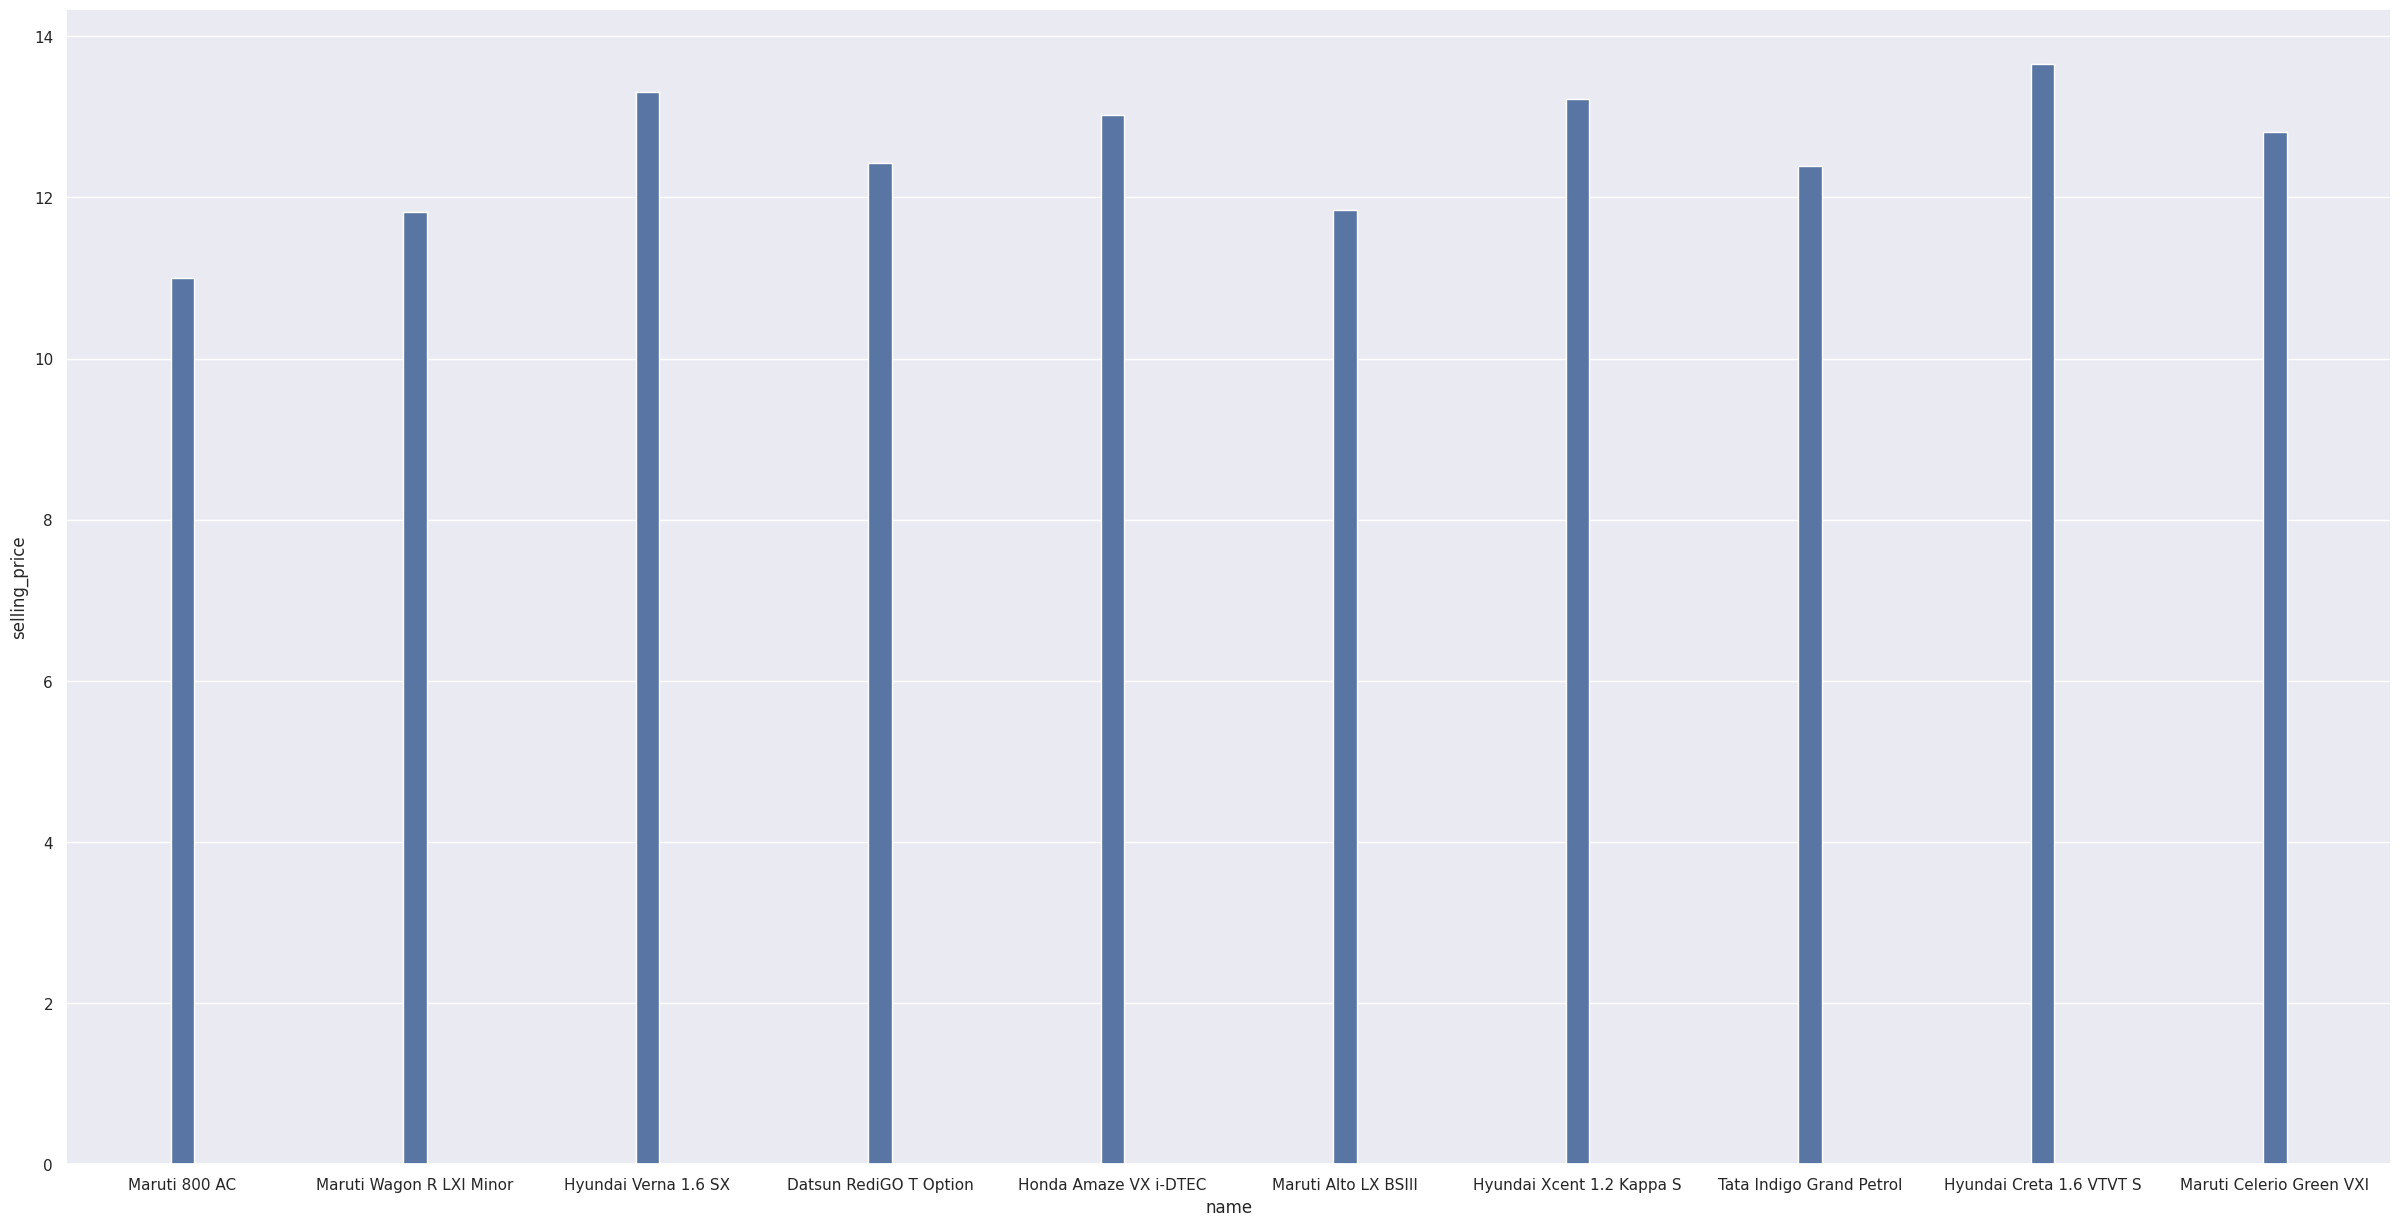

In [2193]:
plt.figure(figsize=(30,15))
sns.barplot(x='name', y='selling_price',data=df[:10],width=0.1)

<Axes: xlabel='fuel', ylabel='selling_price'>

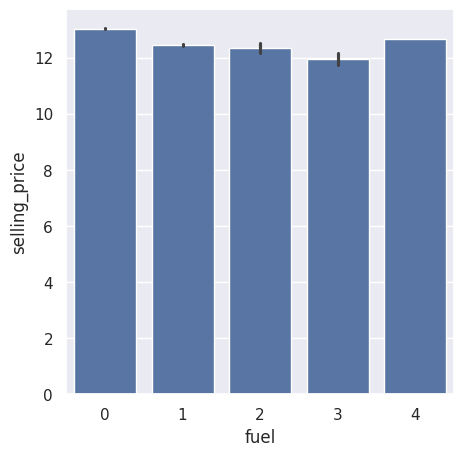

In [2194]:
plt.figure(figsize=(5,5))
sns.barplot(x='fuel', y='selling_price', data=df)

<Axes: xlabel='seller_type', ylabel='selling_price'>

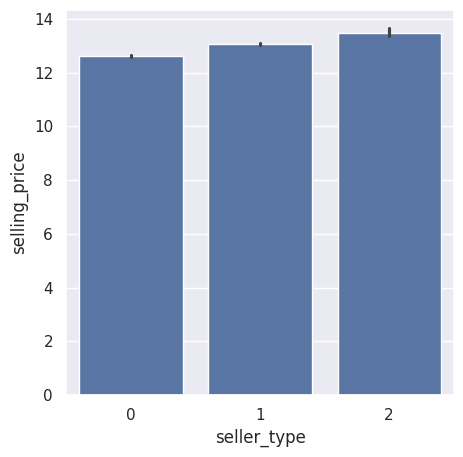

In [2195]:
plt.figure(figsize=(5,5))
sns.barplot(x='seller_type', y='selling_price', data=df)

<Axes: xlabel='transmission', ylabel='selling_price'>

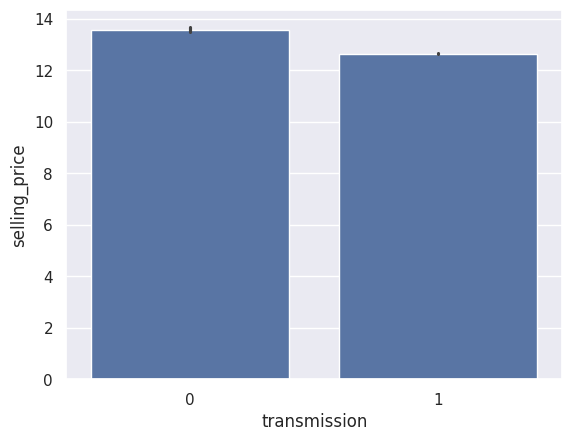

In [2196]:
sns.barplot(x='transmission', y='selling_price', data=df)

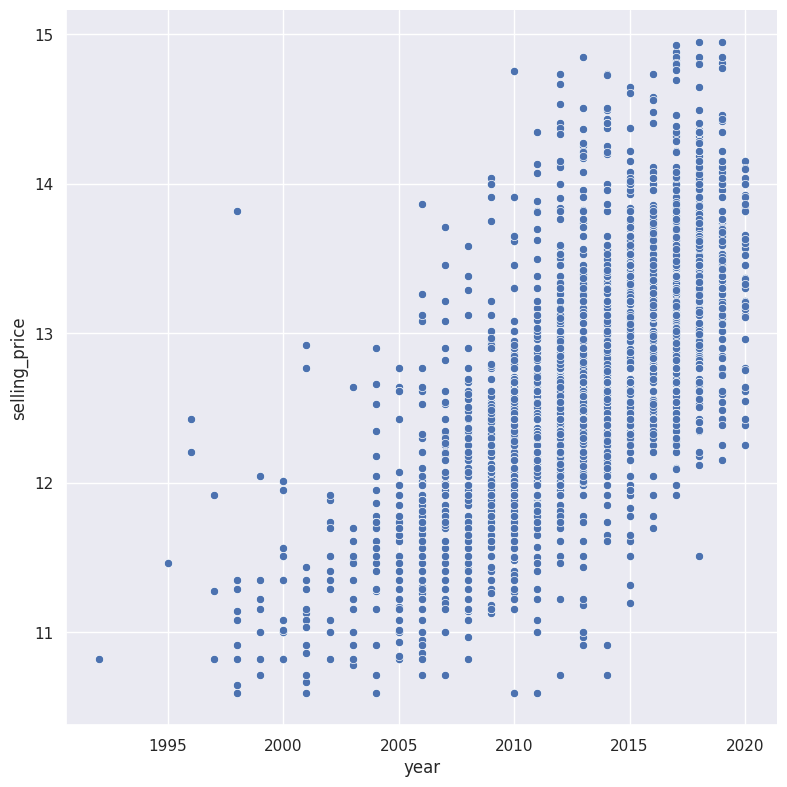

In [2197]:
sns.set(style='darkgrid')
sns.pairplot(df, x_vars=['year'], y_vars='selling_price',height=8, aspect=1, kind='scatter')

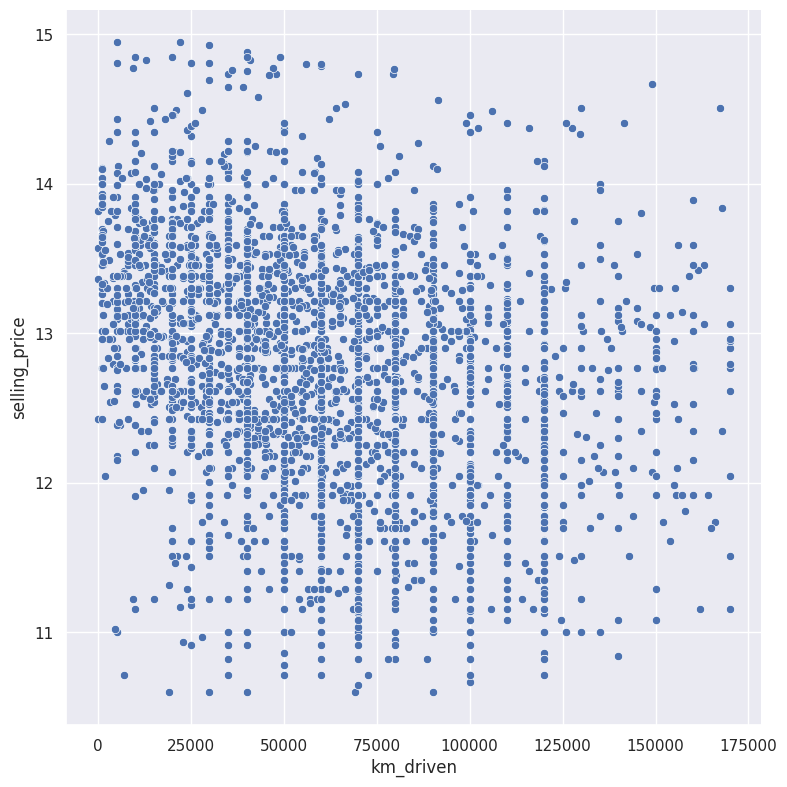

In [2198]:
sns.pairplot(df, x_vars=['km_driven'], y_vars='selling_price',height=8, aspect=1, kind='scatter')

In [2199]:
df.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,3442.000000,3442.000000,3442.000000,3442.000000,3442.00000,3442.000000,3442.00000
mean,2013.037188,12.723006,64571.306798,0.534573,0.21964,0.917199,0.50523
std,4.242957,0.789774,36718.128705,0.558776,0.43661,0.275621,0.76284
min,1992.000000,10.596635,1.000000,0.000000,0.00000,0.000000,0.00000
25%,2011.000000,12.206073,35000.000000,0.000000,0.00000,1.000000,0.00000
50%,2014.000000,12.765688,60000.000000,1.000000,0.00000,1.000000,0.00000
75%,2016.000000,13.297576,90000.000000,1.000000,0.00000,1.000000,1.00000
max,2020.000000,14.946913,170000.000000,4.000000,2.00000,1.000000,4.00000


In [2200]:
df1 = df['name']
df1

0                             Maruti 800 AC
1                  Maruti Wagon R LXI Minor
2                      Hyundai Verna 1.6 SX
3                    Datsun RediGO T Option
4                     Honda Amaze VX i-DTEC
                       ...                 
4335    Hyundai i20 Magna 1.4 CRDi (Diesel)
4336             Hyundai i20 Magna 1.4 CRDi
4337                    Maruti 800 AC BSIII
4338       Hyundai Creta 1.6 CRDi SX Option
4339                       Renault KWID RXT
Name: name, Length: 3442, dtype: object

In [2201]:
df.drop("name", axis=1, inplace=True)

<ipython-input-2201-670c66cd2410>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("name", axis=1, inplace=True)


In [2202]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,11.002100,70000,1,0,1,0
1,2007,11.813030,50000,1,0,1,0
2,2012,13.304685,100000,0,0,1,0
3,2017,12.429216,46000,1,0,1,0
4,2014,13.017003,141000,0,0,1,1
...,...,...,...,...,...,...,...
4335,2014,12.923910,80000,0,0,1,1
4336,2014,12.923910,80000,0,0,1,1
4337,2009,11.608236,83000,1,0,1,1
4338,2016,13.670485,90000,0,0,1,0


##Splitting the Dataset

In [2204]:
x = df.drop("selling_price", axis=1)
y = df["selling_price"]

In [2205]:
print(x)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             1      0
1     2007      50000     1            0             1      0
2     2012     100000     0            0             1      0
3     2017      46000     1            0             1      0
4     2014     141000     0            0             1      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             1      1
4336  2014      80000     0            0             1      1
4337  2009      83000     1            0             1      1
4338  2016      90000     0            0             1      0
4339  2016      40000     1            0             1      0

[3442 rows x 6 columns]


In [2206]:
print(y)

0       11.002100
1       11.813030
2       13.304685
3       12.429216
4       13.017003
          ...    
4335    12.923910
4336    12.923910
4337    11.608236
4338    13.670485
4339    12.323856
Name: selling_price, Length: 3442, dtype: float64


##Evaluating the model with training data(Used Polynomial Regression)

In [2207]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [2208]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [2209]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2210]:
degree = 2
lin_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
lin_reg.fit(x_train_scaled, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [2211]:
pred_train = lin_reg.predict(x_train_scaled)

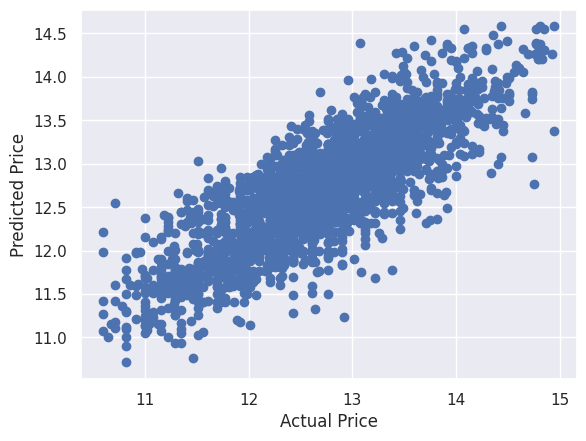

In [2212]:
plt.scatter(y_train, pred_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [2213]:
error_score = metrics.r2_score(y_train, pred_train)
print("R squared Error :", error_score)

R squared Error : 0.685825052892582


Text(0, 0.5, 'actual price')

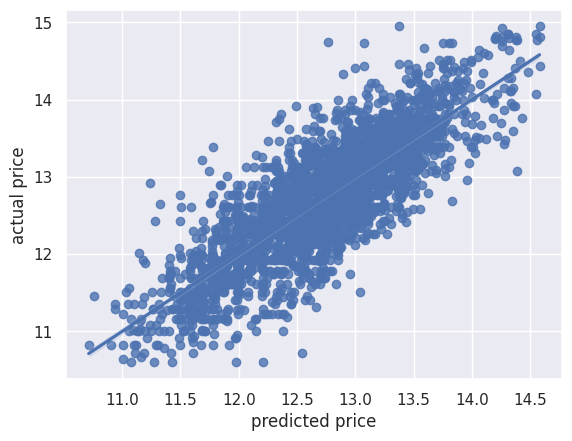

In [2214]:
sns.regplot(x=pred_train,y=y_train)
plt.xlabel("predicted price")
plt.ylabel("actual price")

#SCOPE FOR IMPROVEMENT
We tried our best to clean the data but the dataset is too variable. That is why the R sqaured error came out to be around 0.70. We will look into it and work for further improvement.